In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('car data_dekho.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.duplicated().sum()


2

In [7]:
#data[data.duplicated()]


In [8]:
#data[data.Car_Name == 'fortuner']


In [9]:
data=data.drop_duplicates()


In [10]:
cat_col = data[['Fuel_Type','Transmission','Seller_Type','Owner']]
for i in cat_col:
    print(data[i].unique())


['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
['Dealer' 'Individual']
[0 1 3]


In [11]:
new_data = data.copy()
new_data=new_data.drop('Car_Name',axis=1)

In [12]:
import datetime
new_data['Yrs_Old']=abs(new_data['Year'] - datetime.datetime.now().year)

In [13]:
new_data=new_data.drop('Year',axis=1)


In [14]:
pop = new_data.pop('Yrs_Old')
new_data.insert(0,'Yrs_Old',pop)
new_data


,Yrs_Old,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,7,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,8,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,14,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,6,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for cols in new_data.columns:
    if new_data[cols].dtype == 'object':
        new_data[cols]=LE.fit_transform(new_data[cols])

In [16]:
new_data.corr()


,Yrs_Old,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Yrs_Old,1.000000,-0.234369,0.053563,0.525714,0.046210,0.036820,-0.003434,0.181639
Selling_Price,-0.234369,1.000000,0.876378,0.028566,-0.500292,-0.553851,-0.348869,-0.087880
Present_Price,0.053563,0.876378,1.000000,0.205253,-0.431809,-0.511686,-0.334265,0.009947
Kms_Driven,0.525714,0.028566,0.205253,1.000000,-0.167287,-0.101030,-0.163881,0.089367
Fuel_Type,0.046210,-0.500292,-0.431809,-0.167287,1.000000,0.347922,0.068618,0.054174
Seller_Type,0.036820,-0.553851,-0.511686,-0.101030,0.347922,1.000000,0.058669,0.123646
Transmission,-0.003434,-0.348869,-0.334265,-0.163881,0.068618,0.058669,1.000000,-0.052166
Owner,0.181639,-0.087880,0.009947,0.089367,0.054174,0.123646,-0.052166,1.000000


<Axes: >

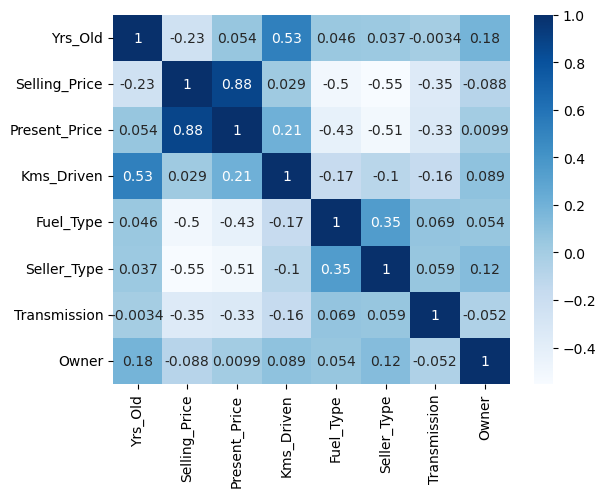

In [17]:
sns.heatmap(new_data.corr(),annot=True,cmap='Blues')


In [18]:
x=new_data.iloc[:,new_data.columns!='Selling_Price']
y=new_data.loc[:,'Selling_Price']


In [19]:
#for feature importance
#from sklearn.ensemble import ExtraTreesRegressor

In [20]:
#ER = ExtraTreesRegressor()
#ER.fit(x,y)
#ER.feature_importances_

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [23]:
#hyperparamter tuning
n_estimators = [int(x) for x in np.linspace(100,1500,10)]
criterion = ["squared_error"]
max_depth = [int(x) for x in np.linspace(5,15,1)]
min_samples_split = [int(x) for x in np.linspace(5,30,2)]
min_samples_leaf = [int(x) for x in np.linspace(5,30,2)]
max_features = ['sqrt','log2']
max_samples = [1,2,3,4,5,6,7,8,9,10]

In [24]:
from sklearn.model_selection import RandomizedSearchCV


In [25]:
R_CV = {'n_estimators':n_estimators,
       'criterion':criterion,
       'max_depth':max_depth,
       'min_samples_split':min_samples_split,
       'min_samples_leaf':min_samples_leaf,
       'max_features':max_features,
       'max_samples':max_samples}

In [35]:
param_est=RandomizedSearchCV(estimator=rf,param_distributions=R_CV,scoring='neg_mean_squared_error',cv=10,n_iter=10,
                   random_state=50,verbose=2)

In [ ]:
param_est.fit(x_train,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, max_samples=9, min_samples_leaf=30, min_samples_split=5, n_estimators=722; total time=   0.4s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, max_samples=9, min_samples_leaf=30, min_samples_split=5, n_estimators=722; total time=   0.4s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, max_samples=9, min_samples_leaf=30, min_samples_split=5, n_estimators=722; total time=   0.4s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, max_samples=9, min_samples_leaf=30, min_samples_split=5, n_estimators=722; total time=   0.4s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, max_samples=9, min_samples_leaf=30, min_samples_split=5, n_estimators=722; total time=   0.4s
[CV] END criterion=squared_error, max_depth=5, max_features=sqrt, max_samples=9, min_samples_leaf=30, min_samples_split=5, n_estimators=7

[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=8, min_samples_leaf=5, min_samples_split=5, n_estimators=255; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=8, min_samples_leaf=5, min_samples_split=5, n_estimators=255; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=8, min_samples_leaf=5, min_samples_split=5, n_estimators=255; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=8, min_samples_leaf=5, min_samples_split=5, n_estimators=255; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=8, min_samples_leaf=5, min_samples_split=5, n_estimators=255; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=8, min_samples_leaf=5, min_samples_split=5, n_estimators=255; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5,

In [ ]:
predict = param_est.predict(x_test)
predict


In [ ]:
sns.distplot(y_test,predict)


In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_test,predict)

In [ ]:
param_est.best_params_


In [32]:
param_est.


-25.66455833681236

In [70]:
import pickle 

In [71]:
file = open('Car_Model_RF.pkl','wb')
pickle.dump(param_est,file)

In [37]:
#new_data